In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
path = r"C:\Users\owenb\PycharmProjects\Tracking-Tortoise\logged_data\20200920_location.csv"

data = pd.read_csv(path)

In [6]:
data = data.iloc[:-1,:] # remove the last NaN row that occurs if the pi is shutdown mid write

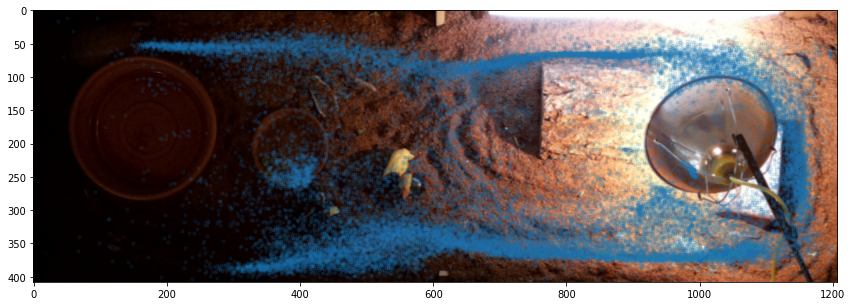

In [7]:
img = r"C:\Users\owenb\PycharmProjects\Tracking-Tortoise\cage.png"

img = mpimg.imread(img)

plt.figure(1,figsize=(15,5))
plt.imshow(img)
plt.plot(data['x_pixel'].to_numpy(),data['y_pixel'].to_numpy(),'.',alpha=.1)
plt.savefig('20200920.png')
plt.show()

In [8]:
# code for making a gif of the tortoise location
# this section can take a while to run

# import os

# filenames = []
# for i in range(2000,2200):
#     # plot the line chart
#     plt.figure(1,figsize=(15,5))
#     plt.imshow(img)
#     plt.plot(data['x_pixel'][i:i+20],data['y_pixel'][i:i+20])
    
#     # create file name and append it to a list
#     filename = f'images/{i}.png'
#     filenames.append(filename)

#     # save frame
#     plt.savefig(filename)
#     plt.close()# build gif

In [9]:
# import imageio

# with imageio.get_writer('tortoise.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
# # # Remove files
# for filename in set(filenames):
#     os.remove(filename)

In [11]:
print(data['time'][2000]) # amount of time shown in animation from above
print(data['time'][2200])

# 146 seconds visible in the video

2020/09/20 08:59:28
2020/09/20 09:01:54


In [13]:
from datetime import datetime
data['datetime'] = data['time'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d %H:%M:%S'))
data

,time,x_pixel,y_pixel,datetime
0,2020/09/20 08:10:38,760.4,103.5,2020-09-20 08:10:38
1,2020/09/20 08:10:39,1004.8,257.9,2020-09-20 08:10:39
2,2020/09/20 08:10:40,1053.3,275.1,2020-09-20 08:10:40
3,2020/09/20 08:10:42,1066.3,275.4,2020-09-20 08:10:42
4,2020/09/20 08:10:43,1062.1,302.1,2020-09-20 08:10:43
...,...,...,...,...
37576,2020/09/20 20:21:37,955.4,280.4,2020-09-20 20:21:37
37577,2020/09/20 20:21:57,957.4,229.7,2020-09-20 20:21:57
37578,2020/09/20 20:23:11,937.5,227.3,2020-09-20 20:23:11
37579,2020/09/20 20:23:24,925.9,222.6,2020-09-20 20:23:24


In [15]:
diffs = data[['x_pixel','y_pixel','datetime']].diff()

In [16]:
diffs['distance'] = (diffs['x_pixel']**2 + diffs['y_pixel']**2)**.5
diffs

,x_pixel,y_pixel,datetime,distance
0,NaN,NaN,NaT,NaN
1,244.4,154.4,0 days 00:00:01,289.086008
2,48.5,17.2,0 days 00:00:01,51.459596
3,13.0,0.3,0 days 00:00:02,13.003461
4,-4.2,26.7,0 days 00:00:01,27.028318
...,...,...,...,...
37576,66.1,71.9,0 days 00:00:04,97.666883
37577,2.0,-50.7,0 days 00:00:20,50.739432
37578,-19.9,-2.4,0 days 00:01:14,20.044201
37579,-11.6,-4.7,0 days 00:00:13,12.515990


In [17]:
print('Geno traveled',diffs['distance'].sum()*72/1280/12/5280, 'miles!') # converting pixels to miles

Geno traveled 1.2776229445530327 miles!


In [19]:
diffs['seconds'] = diffs['datetime'].apply(lambda x: x.total_seconds())
diffs['cumsum'] = diffs['distance'].cumsum()
diffs['cumsum_time'] = diffs['seconds'].cumsum()

diffs

,x_pixel,y_pixel,datetime,distance,seconds,cumsum,cumsum_time
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,244.4,154.4,0 days 00:00:01,289.086008,1.0,2.890860e+02,1.0
2,48.5,17.2,0 days 00:00:01,51.459596,1.0,3.405456e+02,2.0
3,13.0,0.3,0 days 00:00:02,13.003461,2.0,3.535491e+02,4.0
4,-4.2,26.7,0 days 00:00:01,27.028318,1.0,3.805774e+02,5.0
...,...,...,...,...,...,...,...
37576,66.1,71.9,0 days 00:00:04,97.666883,4.0,1.439012e+06,43859.0
37577,2.0,-50.7,0 days 00:00:20,50.739432,20.0,1.439062e+06,43879.0
37578,-19.9,-2.4,0 days 00:01:14,20.044201,74.0,1.439082e+06,43953.0
37579,-11.6,-4.7,0 days 00:00:13,12.515990,13.0,1.439095e+06,43966.0


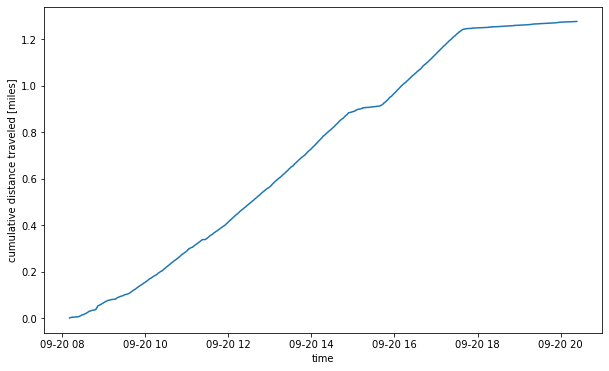

In [20]:
plt.figure(figsize=(10,6))
plt.plot(data['datetime'],diffs['cumsum']*72/1280/12/5280)
plt.xlabel('time')
plt.ylabel('cumulative distance traveled [miles]')
plt.savefig('cumulative_distance.png')

In [21]:
diffs['velocity'] = diffs['distance']/diffs['seconds'] * 1.8288/1280*100 # meters/pixel. end with units of cm/second

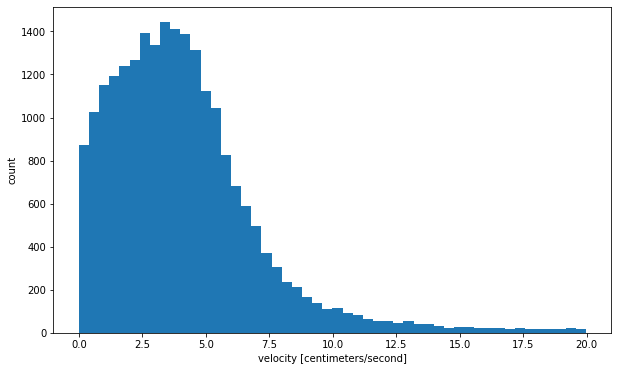

In [22]:
# histograms of velocities where velocity is less than a threshold.
# added this threshold because higher velocities are mostly due to erros in motion detection
plt.figure(figsize=(10,6))
plt.hist(diffs[diffs['velocity'] < 20]['velocity'], bins=50)
plt.xlabel('velocity [centimeters/second]')
plt.ylabel('count')
plt.savefig('velocity_histogram.png')